<a href="https://colab.research.google.com/github/Iampegassi/Masterclass_Resubmission/blob/main/Facial_expression_classification_analysis_resubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'
csv_file_path = os.path.join(dataset_path, 'labels.csv')


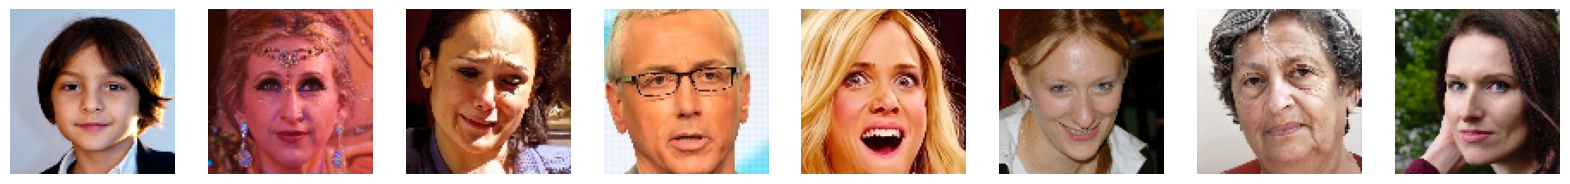

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'
csv_file_path = os.path.join(dataset_path, 'labels.csv')

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Function to display random images horizontally
def display_random_images(dataframe, num_images=8):
    # Get random indices
    random_indices = random.sample(range(len(dataframe)), num_images)
    # Load and display images horizontally
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i, ax in enumerate(axes):
        image_path = os.path.join(dataset_path, dataframe.iloc[random_indices[i]]['pth'])
        image = plt.imread(image_path)
        ax.imshow(image)
        ax.axis('off')
    plt.show()

# Display 8 random images
display_random_images(df, num_images=8)

In [ ]:
import os
import pandas as pd

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'
csv_file_path = os.path.join(dataset_path, 'labels.csv')

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Function to check if image paths exist
def check_image_paths_exist(dataframe):
    missing_paths = []
    for index, row in dataframe.iterrows():
        image_path = os.path.join(dataset_path, row['pth'])
        if not os.path.exists(image_path):
            missing_paths.append(image_path)
    if missing_paths:
        print(f"Found {len(missing_paths)} missing image paths:")
        for path in missing_paths:
            print(path)
    else:
        print("All image paths are valid.")

# Check image paths existence
check_image_paths_exist(df)


All image paths are valid.


PRE-PROCESSING : Split dataset to training and testing

Train and test sets created and saved to /content/drive/My Drive/AffectNet_Dataset/train_labels.csv and /content/drive/My Drive/AffectNet_Dataset/test_labels.csv, respectively.

Displaying 8 random images from the training set after preprocessing:


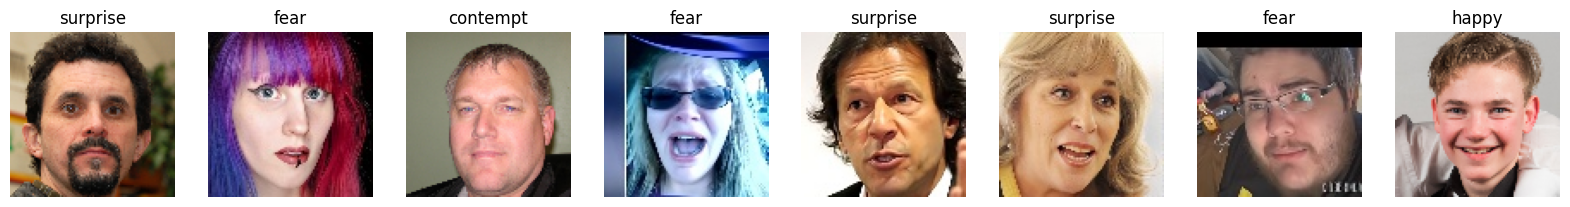


Displaying 8 random images from the testing set after preprocessing:


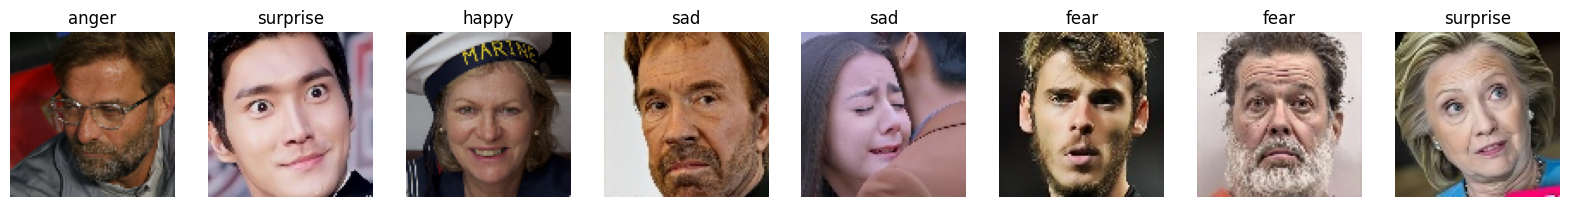


Label Mapping:
anger: 0
contempt: 1
disgust: 2
fear: 3
happy: 4
neutral: 5
sad: 6
surprise: 7


In [5]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split

# Define the path to the dataset
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'
csv_file_path = os.path.join(dataset_path, 'labels.csv')

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Split the data into training and testing sets (70% train, 30% test) with stratification
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label_encoded'])

# Save the resulting dataframes to CSV files
train_csv_path = os.path.join(dataset_path, 'train_labels.csv')
test_csv_path = os.path.join(dataset_path, 'test_labels.csv')

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Train and test sets created and saved to {train_csv_path} and {test_csv_path}, respectively.")

# Custom Dataset class with filtered DataFrames
class CustomDataset(Dataset):
    def __init__(self, data, root_dir, transform=None):
        self.data = data
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.data.iloc[idx, 3]  # Use 'label_encoded' column

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Apply transformations to filtered train and test datasets
train_dataset = CustomDataset(train_df, dataset_path, transform=train_transform)
test_dataset = CustomDataset(test_df, dataset_path, transform=test_transform)

# Display 8 random images from training set after preprocessing
def display_random_images(dataframe, dataset_path, num_images=8):
    # Get random indices
    random_indices = random.sample(range(len(dataframe)), num_images)
    # Load and display images horizontally
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    for i, ax in enumerate(axes):
        image_path = os.path.join(dataset_path, dataframe.iloc[random_indices[i]]['pth'])
        image = plt.imread(image_path)
        ax.imshow(image)
        ax.set_title(dataframe.iloc[random_indices[i]]['label'])  # Set title as label
        ax.axis('off')
    plt.show()

# Display 8 random images from training set after preprocessing
print("\nDisplaying 8 random images from the training set after preprocessing:")
display_random_images(train_df, dataset_path, num_images=8)

# Display 8 random images from testing set after preprocessing
print("\nDisplaying 8 random images from the testing set after preprocessing:")
display_random_images(test_df, dataset_path, num_images=8)

# Print label mapping
print("\nLabel Mapping:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")




In [7]:
# Define paths to train and test CSV files
train_csv_path = '/content/drive/My Drive/AffectNet_Dataset/train_labels.csv'
test_csv_path = '/content/drive/My Drive/AffectNet_Dataset/test_labels.csv'

# Print the count of each label in the training and testing sets after preprocessing
print("\nTraining set label distribution after preprocessing:")
print(train_df['label'].value_counts())

print("\nTesting set label distribution after preprocessing:")
print(test_df['label'].value_counts())



Training set label distribution after preprocessing:
label
surprise    3231
happy       3035
anger       2526
disgust     2430
contempt    2271
fear        2130
sad         2096
neutral     2003
Name: count, dtype: int64

Testing set label distribution after preprocessing:
label
surprise    1385
happy       1301
anger       1082
disgust     1042
contempt     973
fear         913
sad          899
neutral      858
Name: count, dtype: int64


In [8]:
import os
import pandas as pd
from PIL import Image

# Define the paths to your dataset and CSV files
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'
train_csv_path = os.path.join(dataset_path, 'train_labels.csv')
test_csv_path = os.path.join(dataset_path, 'test_labels.csv')

# Function to print image dimensions from a CSV file
def print_image_dimension(csv_path, dataset_path):
    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Get the path to a sample image from the DataFrame
    sample_img_path = os.path.join(dataset_path, df.iloc[0]['pth'])

    # Open the image and print its dimensions
    with Image.open(sample_img_path) as img:
        width, height = img.size
        print(f"Image dimensions in {csv_path}: Width: {width}, Height: {height}")

# Print image dimensions for training set
print_image_dimension(train_csv_path, dataset_path)

# Print image dimensions for testing set
print_image_dimension(test_csv_path, dataset_path)




Image dimensions in /content/drive/My Drive/AffectNet_Dataset/train_labels.csv: Width: 96, Height: 96
Image dimensions in /content/drive/My Drive/AffectNet_Dataset/test_labels.csv: Width: 96, Height: 96


In [6]:
import torch
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms


def custom_collate_fn(batch):
    images, class_labels, image_paths = zip(*batch)

    # Convert images to tensors and stack them
    images = torch.stack(images, dim=0)

    # Encode class labels into numerical labels
    label_encoder = LabelEncoder()
    numerical_labels = label_encoder.fit_transform(class_labels)

    # Convert numerical labels to a tensor
    labels = torch.tensor(numerical_labels)

    return images, labels, image_paths


In [7]:
import os
import torch
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
import time

# Define paths to train and test CSV files
train_csv_path = '/content/drive/My Drive/AffectNet_Dataset/train_labels.csv'
test_csv_path = '/content/drive/My Drive/AffectNet_Dataset/test_labels.csv'

# Define dataset root directory
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'

# Load train and test CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Define custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, root_dir, transform=None):
        self.data = data
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, str(self.data.iloc[idx, 1]))  # Corrected index for img_name
        image = Image.open(img_name).convert('RGB')
        label = self.data.iloc[idx, 4]  # Use 'label_encoded' column

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize images to (224, 224)
    transforms.RandomHorizontalFlip(),         # Random horizontal flip
    transforms.ToTensor(),                     # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize images to (224, 224)
    transforms.ToTensor(),                     # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Apply transformations to filtered train and test datasets
train_dataset = CustomDataset(train_df, dataset_path, transform=train_transform)
test_dataset = CustomDataset(test_df, dataset_path, transform=test_transform)

# Set up data loaders
batch_size = 32
num_workers = 0  # Set to higher value (e.g., 4) if using GPU for faster data loading
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Print dataset information
print("\nDataset Information:")
print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))
print("Batch size:", batch_size)
print("Number of workers:", num_workers)

# Training loop with print statements
start_time = time.time()
for i, (images, labels) in enumerate(train_loader):
    print(f"Batch {i+1}")
    print(f"Images shape: {images.shape}")
    print("Labels:", labels)
    break

end_time = time.time()
print(f"Time taken to load the first batch: {end_time - start_time:.2f} seconds")





Dataset Information:
Number of training samples: 19722
Number of test samples: 8453
Batch size: 32
Number of workers: 0
Batch 1
Images shape: torch.Size([32, 3, 224, 224])
Labels: tensor([4, 4, 4, 6, 1, 2, 7, 2, 4, 1, 0, 4, 1, 2, 5, 6, 6, 3, 2, 3, 1, 7, 7, 5,
        3, 3, 7, 0, 1, 2, 4, 7])
Time taken to load the first batch: 47.70 seconds


MODEL ARCHITECTURE (CNN, RESNET, DENSENET)

In [14]:
import torch
import torch.nn as nn

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CNNModel(nn.Module):
    def __init__(self, num_classes=8):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
cnn_model = CNNModel(num_classes=8)

# Move the model to the appropriate device (GPU if available, otherwise CPU)
cnn_model.to(DEVICE)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.0001)

# Define the learning rate scheduler
gamma = 0.9
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma)

# Define the number of epochs
num_epochs = 20

# Print device information
print(f"Using device: {DEVICE}")



Using device: cuda


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

# Define the 3x3 convolution
class conv3x3(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(conv3x3, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)

    def forward(self, x):
        return self.conv(x)

# Define the BasicBlock for ResNet
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        if self.downsample:
            residual = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual
        out = self.relu(out)
        return out

# Define the ResNet model
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=8):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride):
        strides = [stride] + [1] * (blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the model with 8 output classes
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=8)  # Example: ResNet18

# Define the optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the learning rate scheduler
gamma = 0.9
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma)

# Define the number of epochs
num_epochs = 20

# Print device information
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE}")

# Move the model to the appropriate device
model = model.to(DEVICE)


Using device: cuda


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(DenseLayer, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = torch.cat([x, out], 1)
        return out

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(num_layers):
            layers.append(DenseLayer(in_channels + i * growth_rate, growth_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)

class TransitionBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionBlock, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.pool = nn.AvgPool2d(2, stride=2)

    def forward(self, x):
        x = self.conv(self.relu(self.bn(x)))
        x = self.pool(x)
        return x

class DenseNet(nn.Module):
    def __init__(self, growth_rate=12, block_config=(6, 12, 24, 16), num_classes=8):
        super(DenseNet, self).__init__()
        self.growth_rate = growth_rate
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.features = self._make_dense_layers(block_config)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(self.in_channels, num_classes)

    def _make_dense_layers(self, block_config):
        layers = []
        for num_layers in block_config:
            layers.append(DenseBlock(self.in_channels, self.growth_rate, num_layers))
            self.in_channels += num_layers * self.growth_rate
            if num_layers != block_config[-1]:
                layers.append(TransitionBlock(self.in_channels, self.in_channels // 2))
                self.in_channels //= 2
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Initialize the DenseNet model
model = DenseNet(num_classes=8)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.0003)

# Define the learning rate scheduler
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

# Define the number of epochs
num_epochs = 20

# Print device information
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# Move the model to the appropriate device
model = model.to(DEVICE)


Using device: cuda


TRAINING LOOP

In [ ]:
!pip install tensorboardcolab

  Preparing metadata (setup.py) ... done
  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-py3-none-any.whl size=3832 sha256=db67a4321482b9c6fcbf7115b138120bcea21c067c23e88c87d6b2d3b3740fe3
  Stored in directory: /root/.cache/pip/wheels/8d/ee/46/7fe2bbbf1edbcfeabfaf13962dcaadec1f631d11147fd9d34d
Successfully built tensorboardcolab


In [15]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
import pandas as pd
from PIL import Image
from torchvision.transforms import transforms
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from tqdm.auto import tqdm

# Define paths to train and test CSV files
train_csv_path = '/content/drive/My Drive/AffectNet_Dataset/train_labels.csv'
test_csv_path = '/content/drive/My Drive/AffectNet_Dataset/test_labels.csv'

# Define dataset root directory
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'

# Load train and test CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

class CustomDataset(Dataset):
    def __init__(self, data, root_dir, transform=None):
        self.data = data
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        relative_path = self.data.iloc[idx, 1]  # Access 'pth' column
        img_name = os.path.join(self.root_dir, relative_path)


        try:
            image = Image.open(img_name).convert('RGB')
        except FileNotFoundError:
            print(f"File not found: {img_name}")
            raise

        label = self.data.iloc[idx, 4]  # Use 'label_encoded' column

        if self.transform:
            image = self.transform(image)

        return image, label


# Define transformations for data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize images to (224, 224)
    transforms.RandomHorizontalFlip(),         # Random horizontal flip
    transforms.ToTensor(),                     # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Apply transformations to filtered train dataset
train_dataset = CustomDataset(train_df, dataset_path, transform=train_transform)

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CNNModel(nn.Module):
    def __init__(self, num_classes=8):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.25)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
cnn_model = CNNModel(num_classes=8)

# Move the model to the appropriate device
cnn_model.to(DEVICE)

# Set up TensorBoard writer
save_dir = '/content/drive/MyDrive/AffectNet_Dataset/saved_CNN_AffectNet_model/'
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists
writer = SummaryWriter()

# Define the batch size
batch_size = 32

# Create a DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer)
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 20

# Initialize variables for early stopping
best_loss = float('inf')
patience = 3
counter = 0

# Training loop
for epoch in range(num_epochs):
    cnn_model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    print(f'Epoch [{epoch + 1}/{num_epochs}]')  # Print epoch count

    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} [Training]', leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)  # Move data to the appropriate device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = cnn_model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)  # Use len(train_loader.dataset) instead of len(train_loader)
    epoch_accuracy = 100 * correct / total

    # Print epoch results
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    # Save the model after each epoch
    torch.save(cnn_model.state_dict(), os.path.join(save_dir, f'cnn_model_epoch_{epoch + 1}.pt'))
    print(f'Saved model after epoch {epoch + 1}')

    # Update TensorBoard
    writer.add_scalar('Training Loss', epoch_loss, epoch + 1)
    writer.add_scalar('Training Accuracy', epoch_accuracy, epoch + 1)

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch + 1} due to no improvement in validation loss.')
            break

# Close the TensorBoard writer
writer.close()

print("\nTraining completed!")


Epoch [1/20]


Epoch 1/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [1/20], Loss: 0.0558, Accuracy: 32.60%
Saved model after epoch 1
Epoch [2/20]


Epoch 2/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [2/20], Loss: 0.0489, Accuracy: 41.22%
Saved model after epoch 2
Epoch [3/20]


Epoch 3/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [3/20], Loss: 0.0461, Accuracy: 44.86%
Saved model after epoch 3
Epoch [4/20]


Epoch 4/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [4/20], Loss: 0.0445, Accuracy: 47.22%
Saved model after epoch 4
Epoch [5/20]


Epoch 5/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [5/20], Loss: 0.0430, Accuracy: 49.63%
Saved model after epoch 5
Epoch [6/20]


Epoch 6/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [6/20], Loss: 0.0415, Accuracy: 50.79%
Saved model after epoch 6
Epoch [7/20]


Epoch 7/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [7/20], Loss: 0.0401, Accuracy: 52.46%
Saved model after epoch 7
Epoch [8/20]


Epoch 8/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [8/20], Loss: 0.0387, Accuracy: 54.64%
Saved model after epoch 8
Epoch [9/20]


Epoch 9/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [9/20], Loss: 0.0374, Accuracy: 56.42%
Saved model after epoch 9
Epoch [10/20]


Epoch 10/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [10/20], Loss: 0.0341, Accuracy: 60.92%
Saved model after epoch 10
Epoch [11/20]


Epoch 11/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [11/20], Loss: 0.0305, Accuracy: 65.00%
Saved model after epoch 11
Epoch [12/20]


Epoch 12/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [12/20], Loss: 0.0268, Accuracy: 69.87%
Saved model after epoch 12
Epoch [13/20]


Epoch 13/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [13/20], Loss: 0.0235, Accuracy: 73.88%
Saved model after epoch 13
Epoch [14/20]


Epoch 14/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [14/20], Loss: 0.0198, Accuracy: 78.38%
Saved model after epoch 14
Epoch [15/20]


Epoch 15/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [15/20], Loss: 0.0172, Accuracy: 81.06%
Saved model after epoch 15
Epoch [16/20]


Epoch 16/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [16/20], Loss: 0.0142, Accuracy: 84.72%
Saved model after epoch 16
Epoch [17/20]


Epoch 17/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [17/20], Loss: 0.0121, Accuracy: 87.14%
Saved model after epoch 17
Epoch [18/20]


Epoch 18/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [18/20], Loss: 0.0106, Accuracy: 88.65%
Saved model after epoch 18
Epoch [19/20]


Epoch 19/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [19/20], Loss: 0.0090, Accuracy: 90.34%
Saved model after epoch 19
Epoch [20/20]


Epoch 20/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.0080, Accuracy: 91.46%
Saved model after epoch 20

Training completed!


In [31]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm
from PIL import Image
import pandas as pd

# Define paths to train and test CSV files
train_csv_path = '/content/drive/My Drive/AffectNet_Dataset/train_labels.csv'
test_csv_path = '/content/drive/My Drive/AffectNet_Dataset/test_labels.csv'

# Define dataset root directory
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'

# Load train and test CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, root_dir, transform=None):
        self.data = data
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        relative_path = self.data.iloc[idx, 1]  # Access 'pth' column
        img_name = os.path.join(self.root_dir, relative_path)

        try:
            image = Image.open(img_name).convert('RGB')
        except FileNotFoundError:
            print(f"File not found: {img_name}")
            raise

        label = self.data.iloc[idx, 4]  # Use 'label_encoded' column

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize images to (224, 224)
    transforms.RandomHorizontalFlip(),         # Random horizontal flip
    transforms.ToTensor(),                     # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Apply transformations to filtered train dataset
train_dataset = CustomDataset(train_df, dataset_path, transform=train_transform)

# Define lists to store training loss and accuracy for each epoch
train_losses = []
train_accuracies = []

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the 3x3 convolution
class conv3x3(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(conv3x3, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)

    def forward(self, x):
        return self.conv(x)

# Define the BasicBlock for ResNet
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = x
        if self.downsample:
            residual = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual
        out = self.relu(out)
        return out

# Define the ResNet model
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=8):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

    def make_layer(self, block, out_channels, blocks, stride):
        strides = [stride] + [1] * (blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the model
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=8).to(DEVICE)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 20

# Define the directory where you want to save the models
save_dir = '/content/drive/MyDrive/AffectNet_Dataset/saved_ResNet_AffectNet_model/'
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

# Set up TensorBoard writer
writer = SummaryWriter()

# Initialize variables for early stopping
best_loss = float('inf')
patience = 3
counter = 0

# Define the batch size
batch_size = 32

# Create a DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    print(f'Epoch [{epoch + 1}/{num_epochs}]')  # Print epoch count

    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} [Training]', leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)  # Move data to the appropriate device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    # Append loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Print epoch results
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    # Save the model after each epoch
    torch.save(model.state_dict(), os.path.join(save_dir, f'resnet_model_epoch_{epoch + 1}.pt'))
    print(f'Saved model after epoch {epoch + 1}')

    # Update TensorBoard
    writer.add_scalar('Training Loss', epoch_loss, epoch + 1)
    writer.add_scalar('Training Accuracy', epoch_accuracy, epoch + 1)

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch + 1} due to no improvement in validation loss.')
            break

# Close the TensorBoard writer
writer.close()

print("\nTraining completed!")


Epoch [1/20]


Epoch 1/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/20], Loss: 2.0843, Accuracy: 17.72%
Saved model after epoch 1
Epoch [2/20]


Epoch 2/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [2/20], Loss: 1.8280, Accuracy: 31.16%
Saved model after epoch 2
Epoch [3/20]


Epoch 3/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [3/20], Loss: 1.5339, Accuracy: 41.95%
Saved model after epoch 3
Epoch [4/20]


Epoch 4/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [4/20], Loss: 1.3106, Accuracy: 51.11%
Saved model after epoch 4
Epoch [5/20]


Epoch 5/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [5/20], Loss: 1.1782, Accuracy: 55.80%
Saved model after epoch 5
Epoch [6/20]


Epoch 6/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [6/20], Loss: 1.0723, Accuracy: 59.85%
Saved model after epoch 6
Epoch [7/20]


Epoch 7/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [7/20], Loss: 0.9689, Accuracy: 64.03%
Saved model after epoch 7
Epoch [8/20]


Epoch 8/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [8/20], Loss: 0.8849, Accuracy: 66.80%
Saved model after epoch 8
Epoch [9/20]


Epoch 9/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [9/20], Loss: 0.8001, Accuracy: 70.23%
Saved model after epoch 9
Epoch [10/20]


Epoch 10/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [10/20], Loss: 0.7220, Accuracy: 73.16%
Saved model after epoch 10
Epoch [11/20]


Epoch 11/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [11/20], Loss: 0.6409, Accuracy: 76.47%
Saved model after epoch 11
Epoch [12/20]


Epoch 12/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [12/20], Loss: 0.5571, Accuracy: 79.34%
Saved model after epoch 12
Epoch [13/20]


Epoch 13/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [13/20], Loss: 0.4745, Accuracy: 82.55%
Saved model after epoch 13
Epoch [14/20]


Epoch 14/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [14/20], Loss: 0.3979, Accuracy: 85.40%
Saved model after epoch 14
Epoch [15/20]


Epoch 15/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [15/20], Loss: 0.3431, Accuracy: 87.41%
Saved model after epoch 15
Epoch [16/20]


Epoch 16/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [16/20], Loss: 0.2799, Accuracy: 89.98%
Saved model after epoch 16
Epoch [17/20]


Epoch 17/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [17/20], Loss: 0.2381, Accuracy: 91.64%
Saved model after epoch 17
Epoch [18/20]


Epoch 18/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [18/20], Loss: 0.2012, Accuracy: 92.91%
Saved model after epoch 18
Epoch [19/20]


Epoch 19/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [19/20], Loss: 0.1601, Accuracy: 94.38%
Saved model after epoch 19
Epoch [20/20]


Epoch 20/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.1512, Accuracy: 94.60%
Saved model after epoch 20

Training completed!


In [19]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm
from PIL import Image
import pandas as pd

# Define paths to train and test CSV files
train_csv_path = '/content/drive/My Drive/AffectNet_Dataset/train_labels.csv'
test_csv_path = '/content/drive/My Drive/AffectNet_Dataset/test_labels.csv'

# Define dataset root directory
dataset_path = '/content/drive/My Drive/AffectNet_Dataset'

# Load train and test CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data, root_dir, transform=None):
        self.data = data
        self.root_dir = root_dir
        self.transform = transform
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        relative_path = self.data.iloc[idx, 1]  # Access 'pth' column
        img_name = os.path.join(self.root_dir, relative_path)

        try:
            image = Image.open(img_name).convert('RGB')
        except FileNotFoundError:
            print(f"File not found: {img_name}")
            raise

        label = self.data.iloc[idx, 4]  # Use 'label_encoded' column

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for data augmentation and normalization
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize images to (224, 224)
    transforms.RandomHorizontalFlip(),         # Random horizontal flip
    transforms.ToTensor(),                     # Convert PIL image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Apply transformations to filtered train dataset
train_dataset = CustomDataset(train_df, dataset_path, transform=train_transform)

# Define lists to store training loss and accuracy for each epoch
train_losses = []
train_accuracies = []

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(DenseLayer, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = torch.cat([x, out], 1)
        return out

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate, num_layers):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(num_layers):
            layers.append(DenseLayer(in_channels + i * growth_rate, growth_rate))
        self.block = nn.Sequential(*layers)

    def forward(self, x):
        return self.block(x)

class TransitionBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionBlock, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.pool = nn.AvgPool2d(2, stride=2)

    def forward(self, x):
        x = self.conv(self.relu(self.bn(x)))
        x = self.pool(x)
        return x

class DenseNet(nn.Module):
    def __init__(self, growth_rate=12, block_config=(6, 12, 24, 16), num_classes=8):
        super(DenseNet, self).__init__()
        self.growth_rate = growth_rate
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.features = self._make_dense_layers(block_config)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(self.in_channels, num_classes)

    def _make_dense_layers(self, block_config):
        layers = []
        for num_layers in block_config:
            layers.append(DenseBlock(self.in_channels, self.growth_rate, num_layers))
            self.in_channels += num_layers * self.growth_rate
            if num_layers != block_config[-1]:
                layers.append(TransitionBlock(self.in_channels, self.in_channels // 2))
                self.in_channels //= 2
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the DenseNet model
model = DenseNet(num_classes=8)

# Initialize the DenseNet model
model = DenseNet().to(DEVICE)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs
num_epochs = 20

# Print device information
print(f"Using device: {DEVICE}")

# Ensure reproducibility
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = True

# Define the directory where you want to save the models
save_dir = '/content/drive/MyDrive/AffectNet_Dataset/saved_DenseNet1_AffectNet_model/'
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists

# Set up TensorBoard writer
writer = SummaryWriter()

# Initialize variables for early stopping
best_loss = float('inf')
patience = 3
counter = 0

# Define the batch size
batch_size = 32

# Create a DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    print(f'Epoch [{epoch + 1}/{num_epochs}]')  # Print epoch count

    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} [Training]', leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)  # Move data to the appropriate device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total

    # Append loss and accuracy to lists
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Print epoch results
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    # Save the model after each epoch
    torch.save(model.state_dict(), os.path.join(save_dir, f'densenet1_model_epoch_{epoch + 1}.pt'))
    print(f'Saved model after epoch {epoch + 1}')

    # Update TensorBoard
    writer.add_scalar('Training Loss', epoch_loss, epoch + 1)
    writer.add_scalar('Training Accuracy', epoch_accuracy, epoch + 1)

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch + 1} due to no improvement in validation loss.')
            break

# Close the TensorBoard writer
writer.close()

print("\nTraining completed!")


Using device: cuda
Epoch [1/20]


Epoch 1/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [1/20], Loss: 2.0935, Accuracy: 16.27%
Saved model after epoch 1
Epoch [2/20]


Epoch 2/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [2/20], Loss: 1.9685, Accuracy: 23.73%
Saved model after epoch 2
Epoch [3/20]


Epoch 3/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [3/20], Loss: 1.6807, Accuracy: 36.21%
Saved model after epoch 3
Epoch [4/20]


Epoch 4/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [4/20], Loss: 1.4835, Accuracy: 43.46%
Saved model after epoch 4
Epoch [5/20]


Epoch 5/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [5/20], Loss: 1.3142, Accuracy: 50.26%
Saved model after epoch 5
Epoch [6/20]


Epoch 6/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [6/20], Loss: 1.2022, Accuracy: 54.56%
Saved model after epoch 6
Epoch [7/20]


Epoch 7/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [7/20], Loss: 1.1139, Accuracy: 57.88%
Saved model after epoch 7
Epoch [8/20]


Epoch 8/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [8/20], Loss: 1.0388, Accuracy: 61.24%
Saved model after epoch 8
Epoch [9/20]


Epoch 9/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [9/20], Loss: 0.9701, Accuracy: 63.55%
Saved model after epoch 9
Epoch [10/20]


Epoch 10/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [10/20], Loss: 0.9013, Accuracy: 66.52%
Saved model after epoch 10
Epoch [11/20]


Epoch 11/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [11/20], Loss: 0.8482, Accuracy: 68.29%
Saved model after epoch 11
Epoch [12/20]


Epoch 12/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [12/20], Loss: 0.8034, Accuracy: 70.25%
Saved model after epoch 12
Epoch [13/20]


Epoch 13/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [13/20], Loss: 0.7505, Accuracy: 72.06%
Saved model after epoch 13
Epoch [14/20]


Epoch 14/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [14/20], Loss: 0.7029, Accuracy: 73.84%
Saved model after epoch 14
Epoch [15/20]


Epoch 15/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [15/20], Loss: 0.6664, Accuracy: 75.56%
Saved model after epoch 15
Epoch [16/20]


Epoch 16/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [16/20], Loss: 0.6125, Accuracy: 77.09%
Saved model after epoch 16
Epoch [17/20]


Epoch 17/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [17/20], Loss: 0.5788, Accuracy: 78.63%
Saved model after epoch 17
Epoch [18/20]


Epoch 18/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [18/20], Loss: 0.5264, Accuracy: 80.52%
Saved model after epoch 18
Epoch [19/20]


Epoch 19/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [19/20], Loss: 0.4893, Accuracy: 81.87%
Saved model after epoch 19
Epoch [20/20]


Epoch 20/20 [Training]:   0%|          | 0/617 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.4559, Accuracy: 83.27%
Saved model after epoch 20

Training completed!


TESTING LOOP

Testing:   0%|          | 0/265 [00:00<?, ?it/s]

Test results saved to: /content/drive/MyDrive/CNN_AffectNet_model_results.csv
Last Test Loss: 2.4851
Last Test Accuracy: 60.00%


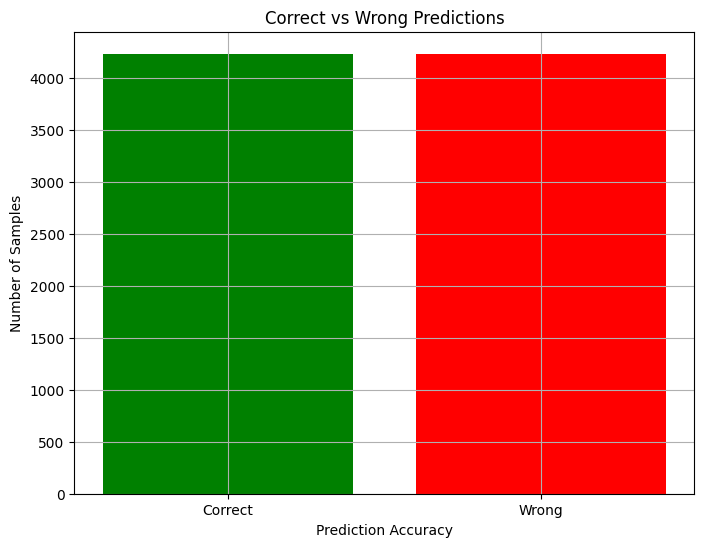

In [16]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn as nn

# Define lists to store test loss and accuracy for each batch
test_losses = []
test_accuracies = []  # Initialize test_accuracies list
all_predictions = []
all_labels = []

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the saved CNN model
saved_model_path = '/content/drive/MyDrive/AffectNet_Dataset/saved_CNN_AffectNet_model/cnn_model_epoch_20.pt'
cnn_model = CNNModel(num_classes=8)
cnn_model.load_state_dict(torch.load(saved_model_path))
cnn_model.to(DEVICE)
cnn_model.eval()

# Define data transformations for testing with augmentation
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(10),  # Random rotation by 10 degrees
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Assuming you have defined test_dataset similarly to train_dataset
# Create a DataLoader for the testing dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize lists to store predictions, true labels, and model outputs
predictions_list = []
true_labels_list = []
model_outputs_list = []
correctly_predicted = []
wrongly_predicted = []

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Disable gradient computation during evaluation
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # Forward pass
        outputs = cnn_model(images)

        # Calculate test loss
        loss = criterion(outputs, labels)
        test_losses.append(loss.item())

        # Calculate test accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        accuracy = correct / total * 100
        test_accuracies.append(accuracy)

        # Save predictions, true labels, and model outputs
        predictions_list.extend(predicted.cpu().numpy())
        true_labels_list.extend(labels.cpu().numpy())
        model_outputs_list.extend(outputs.cpu().numpy())

        # Store correctly and wrongly predicted samples
        correctly_predicted.extend(images[predicted == labels].cpu().numpy())
        wrongly_predicted.extend(images[predicted != labels].cpu().numpy())

# Create a DataFrame to store the information
df = pd.DataFrame({
    'Predictions': predictions_list,
    'True Labels': true_labels_list,
    'Model Outputs': model_outputs_list
})

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/AffectNet_Dataset/CNN_AffectNet_model_results.csv'
df.to_csv(csv_file_path, index=False)

print('Test results saved to:', csv_file_path)

# Print normal (last computed) test loss and accuracy
last_test_loss = test_losses[-1]
last_test_accuracy = test_accuracies[-1]
print('Last Test Loss: {:.4f}'.format(last_test_loss))
print('Last Test Accuracy: {:.2f}%'.format(last_test_accuracy))

# Visualize correctly vs wrongly predicted samples
num_correct = len(correctly_predicted)
num_wrong = len(wrongly_predicted)

plt.figure(figsize=(8, 6))
plt.bar(['Correct', 'Wrong'], [num_correct, num_wrong], color=['green', 'red'])
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Samples')
plt.title('Correct vs Wrong Predictions')
plt.grid(True)
plt.show()


Testing:   0%|          | 0/265 [00:00<?, ?it/s]

Test results saved to: /content/drive/MyDrive/ResNet_AffectNet_model_results.csv
Last Test Loss: 1.0185
Last Test Accuracy: 80.00%


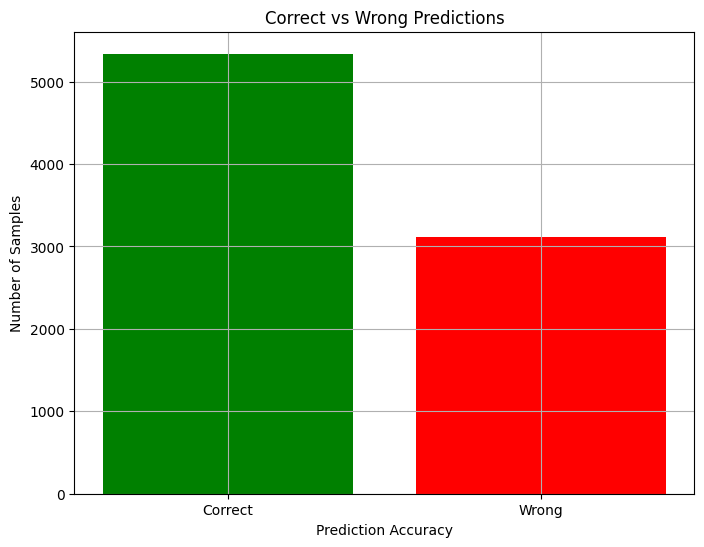

In [25]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn as nn
from PIL import Image

# Define lists to store test loss and accuracy for each batch
test_losses = []
test_accuracies = []
predictions_list = []
true_labels_list = []
model_outputs_list = []

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the saved ResNet model
saved_model_path = '/content/drive/MyDrive/AffectNet_Dataset/saved_ResNet_AffectNet_model/resnet_model_epoch_20.pt'
model = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=8)  # Ensure ResNet architecture matches training
model.load_state_dict(torch.load(saved_model_path))
model.to(DEVICE)
model.eval()

# Define data transformations for testing (without augmentation)
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Assuming you have defined test_dataset similarly to train_dataset
# Create a DataLoader for the testing dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Disable gradient computation during evaluation
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # Forward pass
        outputs = model(images)

        # Calculate test loss
        loss = criterion(outputs, labels)
        test_losses.append(loss.item())

        # Calculate test accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        accuracy = correct / total * 100
        test_accuracies.append(accuracy)

        # Save predictions, true labels, and model outputs
        predictions_list.extend(predicted.cpu().numpy())
        true_labels_list.extend(labels.cpu().numpy())
        model_outputs_list.extend(outputs.cpu().numpy())

# Create a DataFrame to store the information
df = pd.DataFrame({
    'Predictions': predictions_list,
    'True Labels': true_labels_list,
    'Model Outputs': model_outputs_list
})

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/AffectNet_Dataset/ResNet_AffectNet_model_results.csv'
df.to_csv(csv_file_path, index=False)

print('Test results saved to:', csv_file_path)

# Print normal (last computed) test loss and accuracy
last_test_loss = test_losses[-1]
last_test_accuracy = test_accuracies[-1]
print('Last Test Loss: {:.4f}'.format(last_test_loss))
print('Last Test Accuracy: {:.2f}%'.format(last_test_accuracy))

# Visualize correctly vs wrongly predicted samples
num_correct = sum(np.array(predictions_list) == np.array(true_labels_list))
num_wrong = len(predictions_list) - num_correct

plt.figure(figsize=(8, 6))
plt.bar(['Correct', 'Wrong'], [num_correct, num_wrong], color=['green', 'red'])
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Samples')
plt.title('Correct vs Wrong Predictions')
plt.grid(True)
plt.show()


Testing:   0%|          | 0/265 [00:00<?, ?it/s]

Test results saved to: /content/drive/MyDrive/Densenet1_AffectNet_model_results.csv
Last Test Loss: 0.5984
Last Test Accuracy: 80.00%


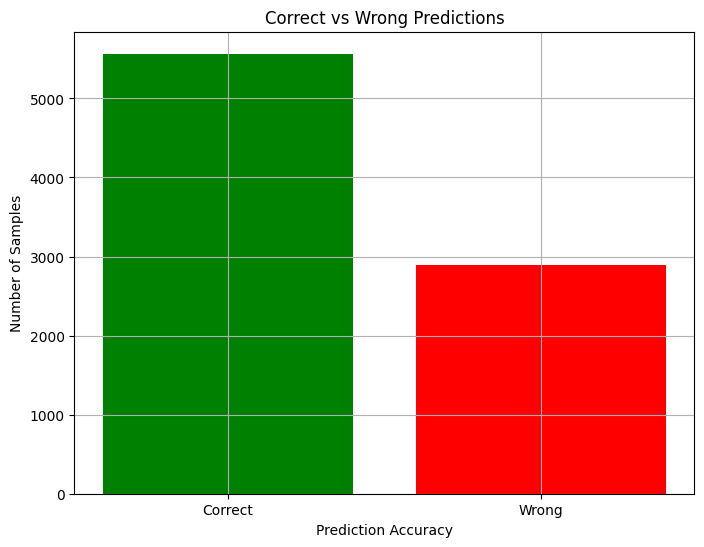

In [22]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn as nn
from PIL import Image

# Define lists to store test loss and accuracy for each batch
test_losses = []
test_accuracies = []
predictions_list = []
true_labels_list = []
model_outputs_list = []

# Define the device (GPU if available, otherwise CPU)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the saved ResNet model
saved_model_path = '/content/drive/MyDrive/AffectNet_Dataset/saved_DenseNet1_AffectNet_model//densenet1_model_epoch_20.pt'
model = DenseNet ( num_classes=8)
model.load_state_dict(torch.load(saved_model_path))
model.to(DEVICE)
model.eval()

# Define data transformations for testing (without augmentation)
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Assuming you have defined test_dataset similarly to train_dataset
# Create a DataLoader for the testing dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Disable gradient computation during evaluation
with torch.no_grad():
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        # Forward pass
        outputs = model(images)

        # Calculate test loss
        loss = criterion(outputs, labels)
        test_losses.append(loss.item())

        # Calculate test accuracy
        _, predicted = torch.max(outputs.data, 1)
        total = labels.size(0)
        correct = (predicted == labels).sum().item()
        accuracy = correct / total * 100
        test_accuracies.append(accuracy)

        # Save predictions, true labels, and model outputs
        predictions_list.extend(predicted.cpu().numpy())
        true_labels_list.extend(labels.cpu().numpy())
        model_outputs_list.extend(outputs.cpu().numpy())

# Create a DataFrame to store the information
df = pd.DataFrame({
    'Predictions': predictions_list,
    'True Labels': true_labels_list,
    'Model Outputs': model_outputs_list
})

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/AffectNet_Dataset/Densenet1_AffectNet_model_results.csv'
df.to_csv(csv_file_path, index=False)

print('Test results saved to:', csv_file_path)

# Print normal (last computed) test loss and accuracy
last_test_loss = test_losses[-1]
last_test_accuracy = test_accuracies[-1]
print('Last Test Loss: {:.4f}'.format(last_test_loss))
print('Last Test Accuracy: {:.2f}%'.format(last_test_accuracy))

# Visualize correctly vs wrongly predicted samples
num_correct = sum(np.array(predictions_list) == np.array(true_labels_list))
num_wrong = len(predictions_list) - num_correct

plt.figure(figsize=(8, 6))
plt.bar(['Correct', 'Wrong'], [num_correct, num_wrong], color=['green', 'red'])
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Samples')
plt.title('Correct vs Wrong Predictions')
plt.grid(True)
plt.show()


EVALUATION METRICS AND BIAS ANALYSIS FOR TESTING LOOP

CNN
{'0': {'precision': 0.454320987654321, 'recall': 0.5101663585951941, 'f1-score': 0.48062690465824986, 'support': 1082}, '1': {'precision': 0.49889135254988914, 'recall': 0.4624871531346352, 'f1-score': 0.48000000000000004, 'support': 973}, '2': {'precision': 0.46530612244897956, 'recall': 0.32821497120921306, 'f1-score': 0.3849184018007878, 'support': 1042}, '3': {'precision': 0.4889975550122249, 'recall': 0.43811610076670315, 'f1-score': 0.462160600808781, 'support': 913}, '4': {'precision': 0.7656488549618321, 'recall': 0.7709454265949269, 'f1-score': 0.7682880122558408, 'support': 1301}, '5': {'precision': 0.3763763763763764, 'recall': 0.4382284382284382, 'f1-score': 0.40495422724824987, 'support': 858}, '6': {'precision': 0.37699316628701596, 'recall': 0.3681868743047831, 'f1-score': 0.3725379853685988, 'support': 899}, '7': {'precision': 0.4818295739348371, 'recall': 0.5552346570397112, 'f1-score': 0.5159342502515935, 'support': 1385}, 'accuracy': 0.49958594581805277, 'macro a

<Figure size 1000x500 with 0 Axes>

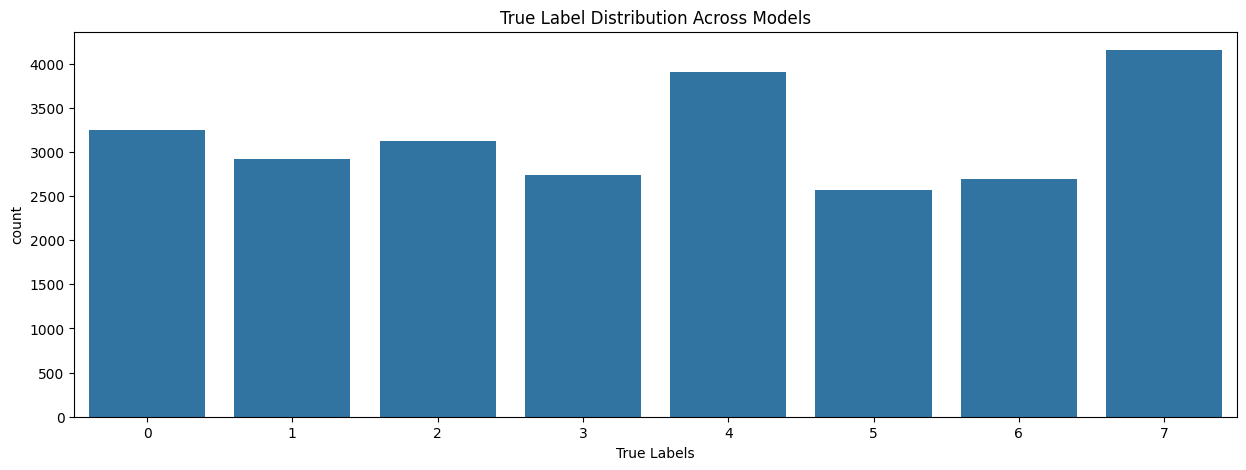

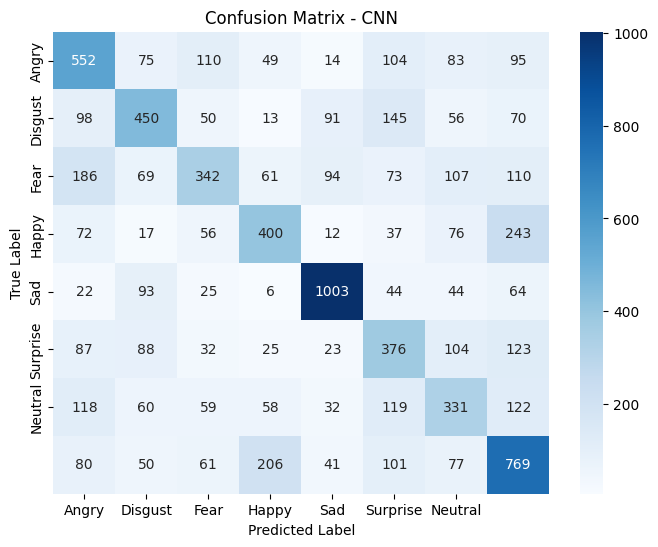

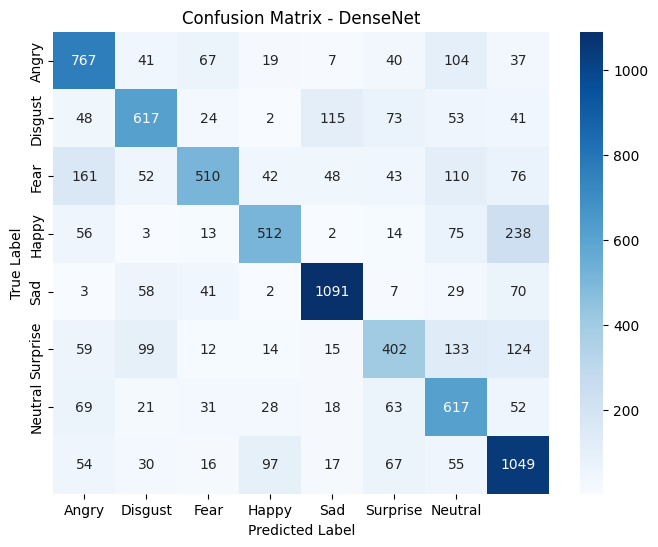

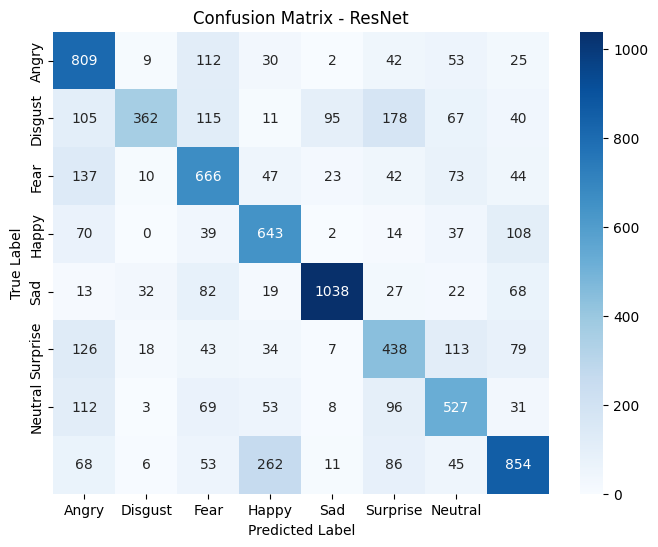

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load the test results from CSV files
cnn_df = pd.read_csv('/content/drive/MyDrive/AffectNet_Dataset/CNN_AffectNet_model_results.csv')
resnet_df = pd.read_csv('/content/drive/MyDrive/AffectNet_Dataset/ResNet_AffectNet_model_results.csv')
densenet_df = pd.read_csv('/content/drive/MyDrive/AffectNet_Dataset/Densenet1_AffectNet_model_results.csv')

# Concatenate the dataframes
combined_df = pd.concat([cnn_df, resnet_df, densenet_df], keys=['CNN', 'ResNet', 'DenseNet'])

# Evaluate performance metrics
performance_metrics = pd.DataFrame()
for model_name, model_df in combined_df.groupby(level=0):
    report = classification_report(model_df['True Labels'], model_df['Predictions'], output_dict=True, zero_division=1)
    print(model_name)
    print(report)
    report_df = pd.DataFrame(report).transpose()
    performance_metrics = pd.concat([performance_metrics, report_df[['precision', 'recall', 'f1-score', 'support']]], axis=1, keys=[model_name])

# Plot performance metrics
plt.figure(figsize=(10, 5))
if 'f1-score' in performance_metrics.columns:
    sns.heatmap(performance_metrics.xs('f1-score', axis=1, level=1), annot=True, cmap='Blues')
    plt.title('F1-score Comparison')
    plt.show()
else:
    print("F1-score not available in the performance metrics.")

# Detect bias
plt.figure(figsize=(15, 5))
sns.countplot(data=combined_df, x='True Labels', hue=combined_df.index.names[0])
plt.title('True Label Distribution Across Models')
plt.show()

# Example: Confusion matrix
for model_name, model_df in combined_df.groupby(level=0):
    cm = confusion_matrix(model_df['True Labels'], model_df['Predictions'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], yticklabels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



DEPLOYMENT

Using device: cuda
Loaded deployment CSV with 5 images.
Model: CNN, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/neutral.jpg, True Label: neutral, Predicted Label: surprise
Model: CNN, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/anger.jpg, True Label: anger, Predicted Label: neutral
Model: CNN, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/happy .jpg, True Label: happy, Predicted Label: neutral
Model: CNN, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/surprise.jpg, True Label: surprise, Predicted Label: fear
Model: CNN, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/happy.jpg, True Label: happy , Predicted Label: happy
Model: ResNet, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/neutral.jpg, True Label: neutral, Predicted Label: fear
Model: ResNet, Image: /content/drive/My Drive/AffectNet_Dataset/Deployment/anger.jpg, True Label: anger, Predicted Label: anger
Model: ResNet, Image: /content/drive/My Dr

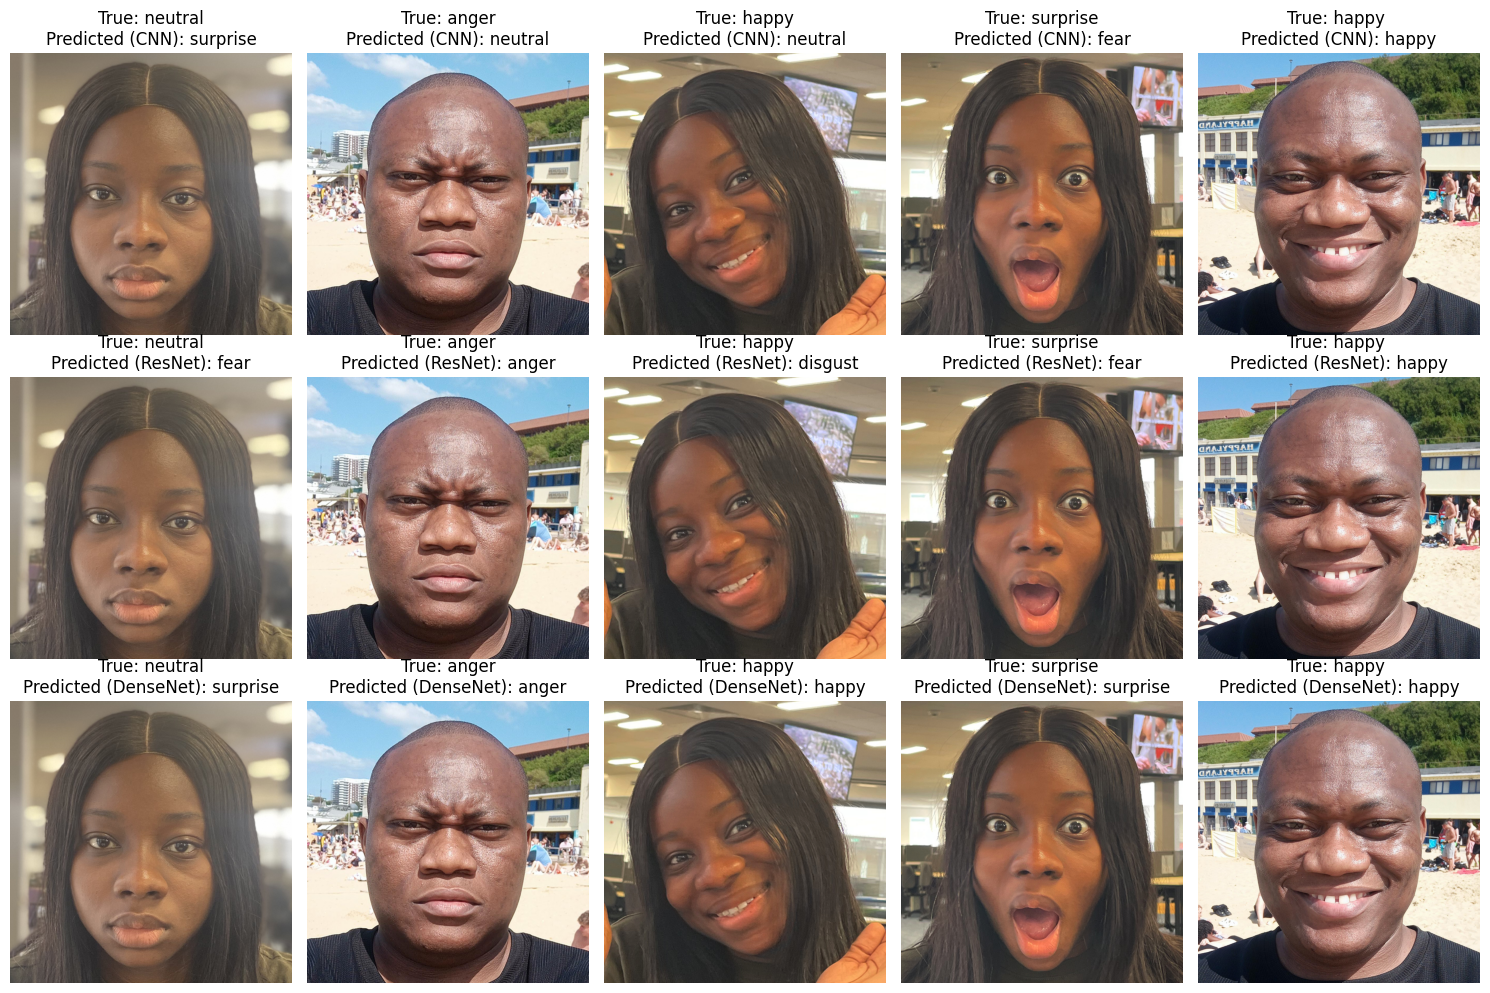

In [68]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

# Device configuration
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {DEVICE}")

# Label mapping
label_mapping = {
    'anger': 0,
    'contempt': 1,
    'disgust': 2,
    'fear': 3,
    'happy': 4,
    'neutral': 5,
    'sad': 6,
    'surprise': 7
}

# Function to load models
def load_model(model_class, model_path, *args, **kwargs):
    model = model_class(*args, **kwargs).to(DEVICE)
    model.load_state_dict(torch.load(model_path, map_location=DEVICE))
    model.eval()
    return model

# Load models
cnn_model = load_model(CNNModel, '/content/drive/MyDrive/AffectNet_Dataset/saved_CNN_AffectNet_model/cnn_model_epoch_20.pt', num_classes=8)
resnet_model = load_model(ResNet, '/content/drive/MyDrive/AffectNet_Dataset/saved_ResNet_AffectNet_model/resnet_model_epoch_20.pt', BasicBlock, [2, 2, 2, 2], num_classes=8)
densenet_model = load_model(DenseNet, '/content/drive/MyDrive/AffectNet_Dataset/saved_DenseNet1_AffectNet_model/densenet1_model_epoch_20.pt', num_classes=8)

# Load deployment CSV
deployment_csv_path = '/content/drive/MyDrive/AffectNet_Dataset/deployment.csv'
df_deployment = pd.read_csv(deployment_csv_path)
print(f"Loaded deployment CSV with {len(df_deployment)} images.")

# Transformations for preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to perform inference on a model
def perform_inference(model, model_name):
    predictions = []
    for _, row in df_deployment.iterrows():
        img_path = row['pth']
        img_label = row['label']

        try:
            img = Image.open(img_path).convert('RGB')
        except FileNotFoundError:
            print(f"Error: Image {img_path} not found.")
            continue

        img_tensor = preprocess(img).unsqueeze(0).to(DEVICE)
        outputs = model(img_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_label = next(key for key, value in label_mapping.items() if value == predicted.item())

        predictions.append({
            'img_path': img_path,
            'true_label': img_label,
            'predicted_label': predicted_label,
            'model_name': model_name
        })
        print(f"Model: {model_name}, Image: {img_path}, True Label: {img_label}, Predicted Label: {predicted_label}")

    return predictions

# Perform inference
predictions_cnn = perform_inference(cnn_model, 'CNN')
predictions_resnet = perform_inference(resnet_model, 'ResNet')
predictions_densenet = perform_inference(densenet_model, 'DenseNet')

# Combine and save predictions
all_predictions = predictions_cnn + predictions_resnet + predictions_densenet
df_predictions = pd.DataFrame(all_predictions)
df_predictions.to_csv('/content/drive/MyDrive/AffectNet_Dataset/deployment_predictions.csv', index=False)
print(f"Saved predictions to /content/drive/MyDrive/AffectNet_Dataset/deployment_predictions.csv")

# Visualize predictions
def visualize_predictions(predictions_df):
    plt.figure(figsize=(15, 10))
    for i, row in predictions_df.iterrows():
        img_path = row['img_path']
        true_label = row['true_label']
        predicted_label = row['predicted_label']
        model_name = row['model_name']

        try:
            img = Image.open(img_path)
        except FileNotFoundError:
            print(f"Error: Image {img_path} not found.")
            continue

        plt.subplot(3, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'True: {true_label}\nPredicted ({model_name}): {predicted_label}')
    plt.tight_layout()
    plt.show()

# Visualize predictions
visualize_predictions(df_predictions)
